In [1]:
# Download libraries

import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import time
import datetime
from scipy import stats
import seaborn as sns

In [2]:
DATA_PATH = r'C:\Users\jgrus\Documents\Machine Learning\Tidio'

def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset.csv")
    return pd.read_csv(csv_path)

In [3]:
cs_data = load_data(DATA_PATH)
cs_data
#cs_data_2 = cs_data.assign(comments_per_comments = cs_data["NumPublicComments"] - cs_data["NumAgentComments"])

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,Plan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
0,1,api,Support (T1),2840334,2021-08-04,Trial,Sunday,Tier 1,13.0,33861.0,18.0,36.0,0,NaN,2015-10-18,London,Employee,2117
1,1,email,Support (T1),2136496,2021-01-09,NaN,Wednesday,Tier 1,58.0,73659.0,30.0,70.0,1,1.0,2015-10-18,London,Employee,1910
2,1,facebook,Support (Triage),3034987,2021-10-12,Professional,Friday,Triage,30.0,1741.0,6.0,15.0,0,NaN,2015-10-18,London,Employee,2186
3,1,email,Support (T1),2311824,2021-03-02,NaN,Sunday,Tier 1,78.0,25654.0,5.0,15.0,0,NaN,2015-10-18,London,Employee,1962
4,1,email,Support (T1),2213615,2021-01-30,Professional,Friday,Tier 1,4.0,16266.0,8.0,17.0,0,0.0,2015-10-18,London,Employee,1931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210797,3051,email,Support (T2 - Japanese),2815682,2021-07-26,Team,Wednesday,Tier 2,22.0,10091.0,8.0,13.0,1,NaN,2021-06-19,Melbourne,Employee,37
210798,3051,email,Support (T2 - Japanese),2850602,2021-08-08,Enterprise Legacy,Sunday,Tier 2,24.0,27256.0,8.0,13.0,1,NaN,2021-06-19,Melbourne,Employee,50
210799,3288,web,Support (T1),3068482,2021-10-24,Team,Wednesday,Tier 1,80.0,11638.0,13.0,13.0,0,0.0,2021-10-02,Dublin,Employee,22
210800,3307,web,Support (Analytics),2526686,2021-04-17,Regular,NaN,NaN,48.0,NaN,6.0,13.0,0,NaN,2021-09-11,Madison,Employee,-147


In [4]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210802 entries, 0 to 210801
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   EmployeeID            210802 non-null  int64  
 1   TicketChannel         210802 non-null  object 
 2   TicketGroup           210802 non-null  object 
 3   TicketID              210802 non-null  int64  
 4   TicketCreatedDate     210802 non-null  object 
 5   Plan                  175183 non-null  object 
 6   DayTicketSolved       209878 non-null  object 
 7   AssigneeTier          207958 non-null  object 
 8   FirstReplyTime        156544 non-null  float64
 9   FullResolutionTime    209878 non-null  float64
 10  NumAgentComments      193743 non-null  float64
 11  NumPublicComments     191822 non-null  float64
 12  TicketEscalated       210802 non-null  int64  
 13  CustomerSatisfaction  40531 non-null   float64
 14  WorkerDateHired       210802 non-null  object 
 15  

In [5]:
cs_data.describe()

,EmployeeID,TicketID,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerTenure
count,210802.000000,2.108020e+05,156544.000000,209878.000000,193743.000000,191822.000000,210802.000000,40531.000000,210802.000000
mean,1847.421794,2.612032e+06,814.661788,6759.925438,3.113754,3.841197,0.179514,0.948558,517.564487
std,687.054936,2.824437e+05,6458.477925,20401.476454,3.509152,4.573110,0.383783,0.220900,373.878844
min,1.000000,2.116910e+06,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-223.000000
25%,1488.000000,2.339642e+06,14.000000,24.000000,1.000000,2.000000,0.000000,1.000000,232.000000
50%,1854.000000,2.628426e+06,53.000000,215.000000,2.000000,2.000000,0.000000,1.000000,466.000000
75%,2452.000000,2.850940e+06,236.000000,10496.000000,4.000000,4.000000,0.000000,1.000000,696.000000
max,3411.000000,3.224171e+06,498116.000000,548814.000000,370.000000,245.000000,1.000000,1.000000,2334.000000


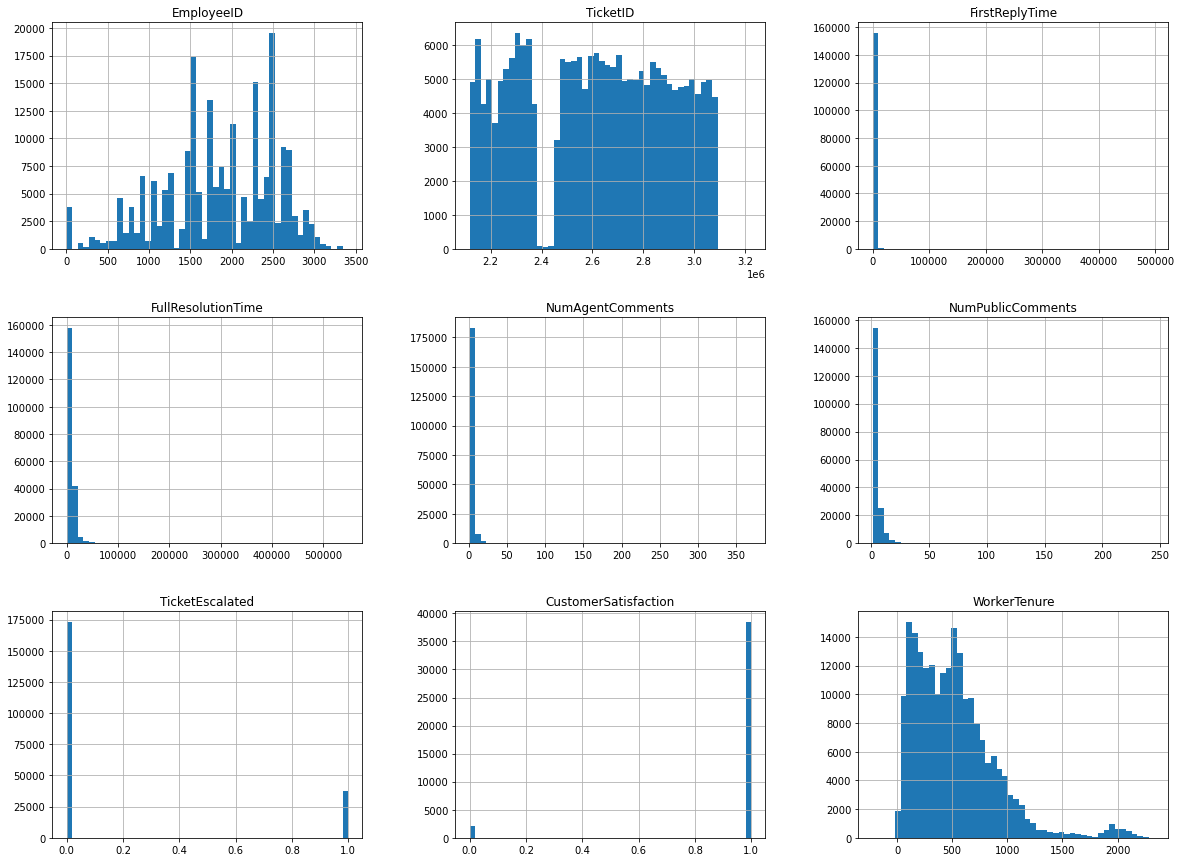

In [6]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
cs_data.hist[](bins=50, figsize=(20,15))
plt.show()

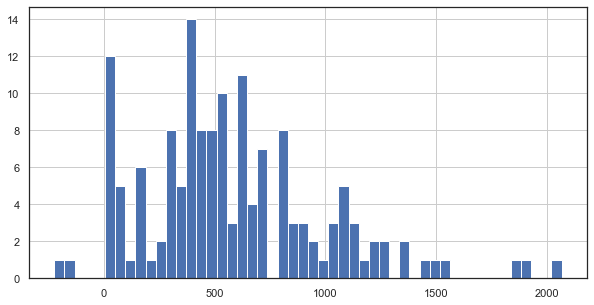

In [79]:


%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
cs_months[0].groupby(["EmployeeID"]).first()["WorkerTenure"].hist(bins=50, figsize=(10,5))
plt.show()

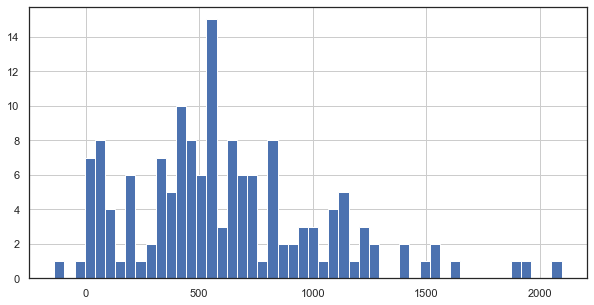

In [80]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
cs_months[1].groupby(["EmployeeID"]).first()["WorkerTenure"].hist(bins=50, figsize=(10,5))
plt.show()

<AxesSubplot:>

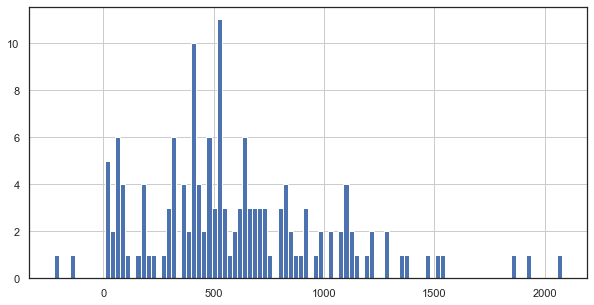

In [91]:
cs_months[0].groupby(["EmployeeID"])["WorkerTenure"].mean().hist(bins=100, figsize=(10,5))

<AxesSubplot:>

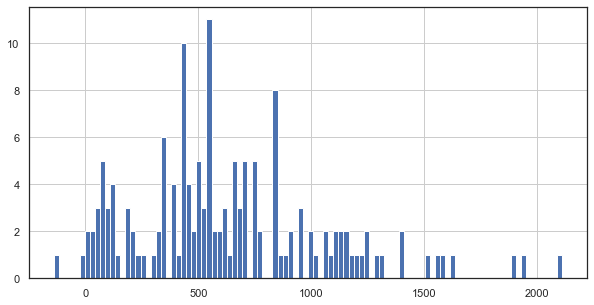

In [90]:
cs_months[1].groupby(["EmployeeID"])["WorkerTenure"].mean().hist(bins=100, figsize=(10,5))

In [7]:
corr_matrix = cs_data.corr()
corr_matrix["FullResolutionTime"].sort_values(ascending=False)

FullResolutionTime      1.000000
NumAgentComments        0.367931
NumPublicComments       0.326019
FirstReplyTime          0.312951
TicketEscalated         0.211951
WorkerTenure            0.081439
TicketID               -0.031055
EmployeeID             -0.088032
CustomerSatisfaction   -0.151891
Name: FullResolutionTime, dtype: float64

In [8]:
# customer churn / customer satisfaction (weekly, monthly, quarterly)

cs_data['TicketCreatedDate'] = pd.to_datetime(cs_data['TicketCreatedDate'])

cs_weeks = [g for n, g in cs_data.groupby(pd.Grouper(key='TicketCreatedDate',freq='W'))]
cs_months = [g for n, g in cs_data.groupby(pd.Grouper(key='TicketCreatedDate',freq='M'))]
cs_quarter = [g for n, g in cs_data.groupby(pd.Grouper(key='TicketCreatedDate',freq='Q'))]

In [9]:
### JANUARY / FEBRUARY

january_data = cs_data[cs_data['TicketCreatedDate'].dt.month == 1]["CustomerSatisfaction"]
february_data = cs_data[cs_data['TicketCreatedDate'].dt.month == 2]["CustomerSatisfaction"]

In [10]:
print(january_data.value_counts())
print(january_data.isna().sum())

1.0    4277
0.0     212
Name: CustomerSatisfaction, dtype: int64
17865


In [11]:
print(february_data.value_counts())
print(february_data.isna().sum())

1.0    4061
0.0     237
Name: CustomerSatisfaction, dtype: int64
17372


<AxesSubplot:ylabel='WorkerLocation'>

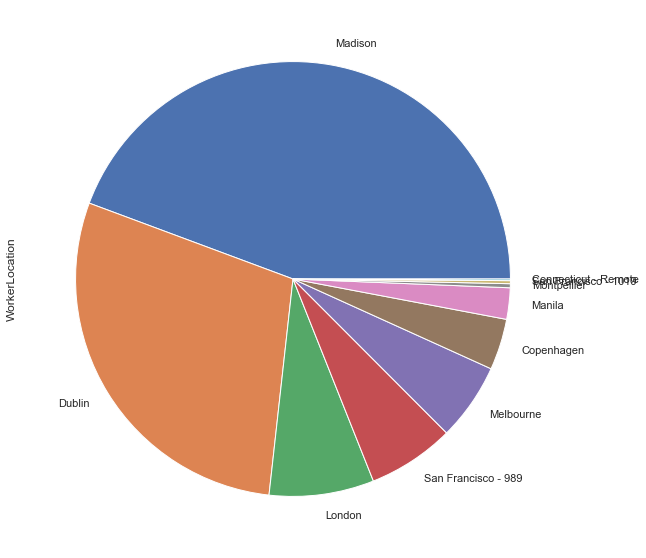

In [61]:
cs_months[0]["WorkerLocation"].value_counts().plot(kind='pie') ## January

<AxesSubplot:ylabel='WorkerLocation'>

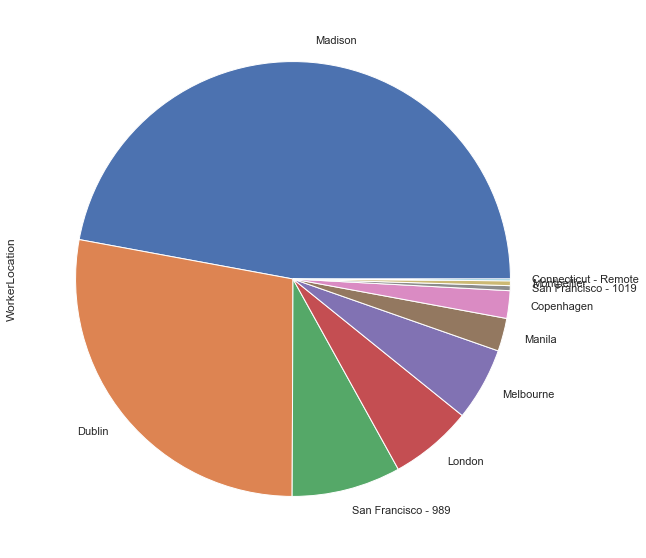

In [60]:
cs_months[1]["WorkerLocation"].value_counts().plot(kind='pie') ## February

In [14]:
len(cs_quarter)

4

In [15]:
len(cs_weeks[0]["CustomerSatisfaction"].dropna())

289

In [16]:
def AverageSatisfaction(input_list):
    satisfaction_percent = []
    dates_list = []
    for df in input_list:
        avg_result = sum(df["CustomerSatisfaction"].dropna()) / len(df["CustomerSatisfaction"])
        satisfaction_percent.append(avg_result)
        dates_list.append(df["TicketCreatedDate"].iloc[0])
    satisfaction_percent = [satisfaction_percent, dates_list]
    return satisfaction_percent

def AverageSatisfaction2(input_list):
    satisfaction_percent = []
    dates_list = []
    for df in input_list:
        avg_result = sum(df["CustomerSatisfaction"].dropna()) / len(df["CustomerSatisfaction"].dropna())
        satisfaction_percent.append(avg_result)
        dates_list.append(df["TicketCreatedDate"].iloc[0])
    satisfaction_percent = [satisfaction_percent, dates_list]
    return satisfaction_percent

def GrossSatisfaction(input_list):
    satisfaction_total = []
    dates_list = []
    for df in input_list:
        total_result = sum(df["CustomerSatisfaction"].dropna())
        satisfaction_total.append(total_result)
        dates_list.append(df["TicketCreatedDate"].iloc[0])
    satisfaction_total = [satisfaction_total, dates_list]
    return satisfaction_total

def GrossSatisfactionZero(input_list):
    satisfaction_total = []
    dates_list = []
    for df in input_list:
        total_result = df["CustomerSatisfaction"].dropna().value_counts()[0]
        satisfaction_total.append(total_result)
        dates_list.append(df["TicketCreatedDate"].iloc[0])
    satisfaction_total = [satisfaction_total, dates_list]
    return satisfaction_total

def GrossSatisfactionNA(input_list):
    satisfaction_total = []
    dates_list = []
    for df in input_list:
        total_result = df["CustomerSatisfaction"].isna().sum()
        satisfaction_total.append(total_result)
        dates_list.append(df["TicketCreatedDate"].iloc[0])
    satisfaction_total = [satisfaction_total, dates_list]
    return satisfaction_total

In [17]:
#GrossSatisfactionZero(cs_weeks)[0]
GrossSatisfaction(cs_weeks)[0]
#GrossSatisfactionNA(cs_weeks)[0]

[277.0,
 840.0,
 1210.0,
 971.0,
 979.0,
 906.0,
 944.0,
 943.0,
 1268.0,
 1098.0,
 938.0,
 1152.0,
 937.0,
 917.0,
 868.0,
 729.0,
 931.0,
 824.0,
 956.0,
 954.0,
 913.0,
 729.0,
 898.0,
 818.0,
 935.0,
 875.0,
 715.0,
 870.0,
 1044.0,
 805.0,
 833.0,
 855.0,
 838.0,
 910.0,
 785.0,
 763.0,
 759.0,
 797.0,
 841.0,
 810.0,
 748.0,
 794.0,
 743.0,
 726.0]

In [18]:
y1 = GrossSatisfaction(cs_weeks)[0]
y2 = GrossSatisfactionZero(cs_weeks)[0]
y3 = GrossSatisfactionNA(cs_weeks)[0]
#x = list(range(1,len(y1+1)))

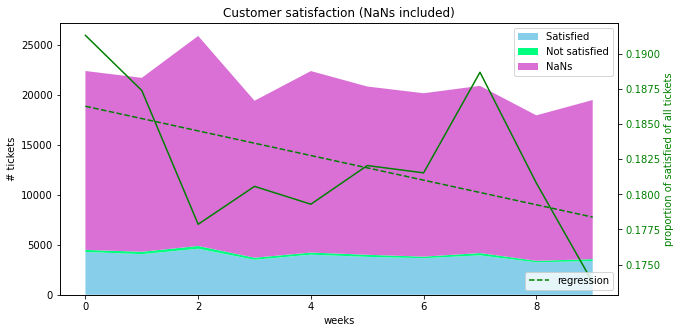

In [19]:
def ReturnRegression(x):
    return slope * x + intercept

time_period = cs_months

y1 = GrossSatisfaction(time_period)[0]
y2 = GrossSatisfactionZero(time_period)[0]
y3 = GrossSatisfactionNA(time_period)[0]
x = list(range(len(y1)))

y4 = AverageSatisfaction(time_period)[0]

y = np.vstack([y1, y2, y3])

labels = ["Satisfied ", "Not satisfied", "NaNs"]

fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax1.stackplot(x, y1, y2, y3, labels=labels, colors = ["skyblue","springgreen", "orchid"])
ax1.set_title('Customer satisfaction (NaNs included)')
ax1.set_ylabel('# tickets')
ax1.set_xlabel("weeks")
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, y4)
mymodel = list(map(ReturnRegression, x))

color = 'green'
ax2.set_ylabel('proportion of satisfied of all tickets', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y4, color=color)
ax2.plot(x, mymodel, color=color, linestyle='dashed', label = "regression")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="lower right")

plt.show()


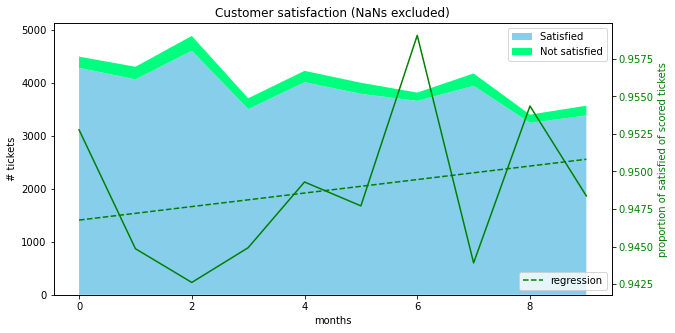

In [20]:
time_period = cs_months

y1 = GrossSatisfaction(time_period)[0]
y2 = GrossSatisfactionZero(time_period)[0]
y3 = GrossSatisfactionNA(time_period)[0]
x = list(range(len(y1)))

y4 = AverageSatisfaction2(time_period)[0]

y = np.vstack([y1, y2, y3])

labels = ["Satisfied ", "Not satisfied", "NaNs"]

fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax1.stackplot(x, y1, y2, labels=labels, colors = ["skyblue","springgreen"])
ax1.set_ylabel('# tickets')
ax1.set_xlabel('months')
ax1.set_title('Customer satisfaction (NaNs excluded)')
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, y4)
mymodel = list(map(ReturnRegression, x))

color = 'green'
ax2.set_ylabel('proportion of satisfied of scored tickets', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y4, color=color)
ax2.plot(x, mymodel, color=color, linestyle='dashed', label = "regression")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="lower right")

plt.show()

18621.0


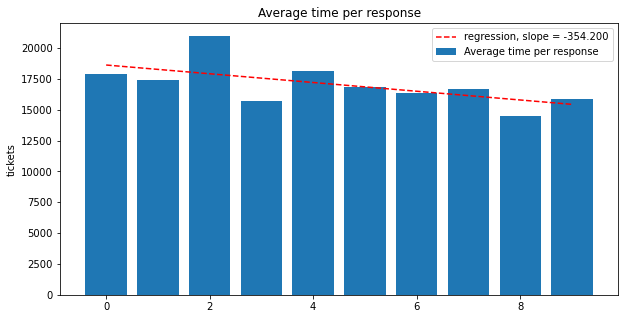

In [21]:
time_period = cs_months

y1 = GrossSatisfaction(time_period)[0]
y2 = GrossSatisfactionZero(time_period)[0]
y3 = GrossSatisfactionNA(time_period)[0]
x = list(range(len(y1)))

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, y3)
mymodel = list(map(ReturnRegression, x))

fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.bar(x, y3, label='Average time per response')
#ax0.bar(x, avg_first_time, label='First reply time')
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax0.set_ylabel('tickets')
ax0.set_title('Average time per response')
ax0.legend(facecolor = "white")

print(intercept)

# satisfaction -21%
# zero -26%
# NA -17%

In [22]:
cs_data.nunique()

EmployeeID                 190
TicketChannel                9
TicketGroup                 26
TicketID                210802
TicketCreatedDate          304
Plan                        14
DayTicketSolved              7
AssigneeTier                 4
FirstReplyTime            8017
FullResolutionTime       27597
NumAgentComments            83
NumPublicComments           92
TicketEscalated              2
CustomerSatisfaction         2
WorkerDateHired            110
WorkerLocation              11
Worker_Type                  2
WorkerTenure              2080
dtype: int64

In [23]:
cs_data.count()

EmployeeID              210802
TicketChannel           210802
TicketGroup             210802
TicketID                210802
TicketCreatedDate       210802
Plan                    175183
DayTicketSolved         209878
AssigneeTier            207958
FirstReplyTime          156544
FullResolutionTime      209878
NumAgentComments        193743
NumPublicComments       191822
TicketEscalated         210802
CustomerSatisfaction     40531
WorkerDateHired         210802
WorkerLocation          210802
Worker_Type             210802
WorkerTenure            210802
dtype: int64

<BarContainer object of 42 artists>

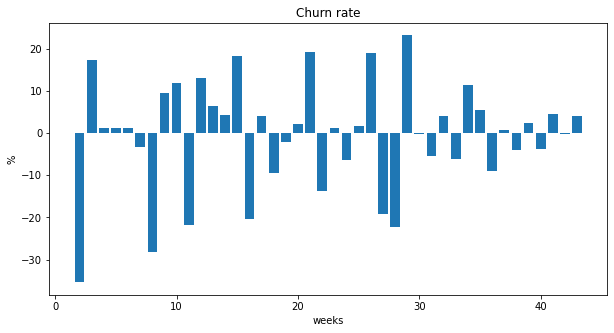

In [24]:
### customer churn (or rather, ticket churn)

time_period = cs_weeks

churn = []

for i in range(1, len(time_period)-1):
    temp_churn = -100*(len(time_period[i+1]) - len(time_period[i]))/(len(time_period[i]))
    churn.append(temp_churn)

x = list(range(2,len(time_period)))  
    
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax1.set_ylabel('%')
ax1.set_xlabel('weeks')
ax1.set_title('Churn rate')
ax1.bar(x, churn)  
#ax1.plot(x, churn, 'r--')  


In [25]:
len(cs_weeks)

44

In [26]:
from matplotlib.dates import MonthLocator, DateFormatter
# Sample data
dates = pd.date_range(min(cs_data['TicketCreatedDate']),max(cs_data['TicketCreatedDate']), periods=42)
values = churn
df = pd.DataFrame({"Date": dates,
                   "Value": values})

In [27]:
-(len(cs_months[9]) - len(cs_months[0]))/(len(cs_months[0])) 

0.12964122752080165

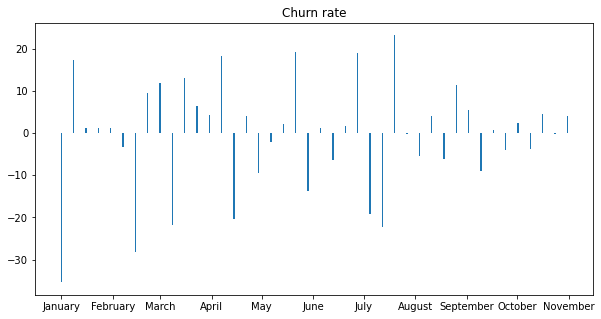

In [28]:
fig, ax = plt.subplots()

ax.bar(df.Date, df.Value)
fig.set_figheight(5)
fig.set_figwidth(10)
ax.set_title('Churn rate')
ax.xaxis.set_major_locator(MonthLocator())  # Tick locator
ax.xaxis.set_major_formatter(DateFormatter('%B'))  # Date format

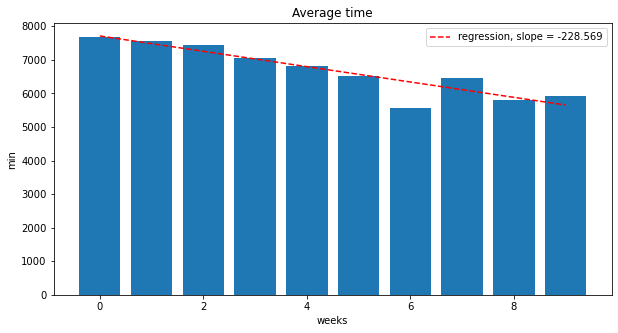

In [29]:
# average resolution time

time_period = cs_months

avg_time = []

for i in range(len(time_period)):
    temp_avg_time = (time_period[i]["FullResolutionTime"].sum())/(len(time_period[i]["FullResolutionTime"]))
    
    #print((time_period[i]["FullResolutionTime"].sum())/(len(time_period[i]["FullResolutionTime"])))
    avg_time.append(temp_avg_time)

x = list(range(len(time_period)))  


# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_time)
mymodel = list(map(ReturnRegression, x))
    
fig, (ax0) = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax0.set_ylabel('min')
ax0.set_xlabel('weeks')
ax0.set_title('Average time')
ax0.bar(x, avg_time)
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax0.legend()




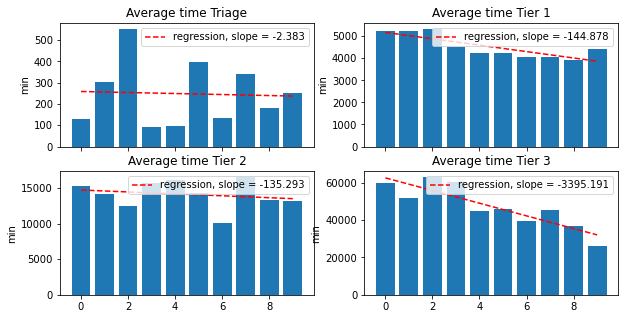

In [30]:
# average resolution time per Tier

time_period = cs_months

avg_time_t1 = []

for i in range(len(time_period)):
    temp_avg_time = (time_period[i][time_period[i]["AssigneeTier"] == "Tier 1"]["FullResolutionTime"].sum())/(len(time_period[i][time_period[i]["AssigneeTier"] == "Tier 1"]))
    avg_time_t1.append(temp_avg_time)

avg_time_t2 = []

for i in range(len(time_period)):
    temp_avg_time = (time_period[i][time_period[i]["AssigneeTier"] == "Tier 2"]["FullResolutionTime"].sum())/(len(time_period[i][time_period[i]["AssigneeTier"] == "Tier 2"]))
    avg_time_t2.append(temp_avg_time)    

avg_time_triage = []

for i in range(len(time_period)):
    temp_avg_time = (time_period[i][time_period[i]["AssigneeTier"] == "Triage"]["FullResolutionTime"].sum())/(len(time_period[i][time_period[i]["AssigneeTier"] == "Triage"]))
    avg_time_triage.append(temp_avg_time)  

avg_time_t3 = []

for i in range(len(time_period)):
    temp_avg_time = (time_period[i][time_period[i]["AssigneeTier"] == "Tier 3"]["FullResolutionTime"].sum())/(len(time_period[i][time_period[i]["AssigneeTier"] == "Tier 3"]))
    avg_time_t3.append(temp_avg_time)      
    
x = list(range(len(time_period)))  


# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_time_t1)
mymodel = list(map(ReturnRegression, x))

fig, ((ax2, ax0), (ax1, ax3)) = plt.subplots(nrows=2, ncols=2, sharex=True,
                                    figsize=(30, 20))
fig.set_figheight(5)
fig.set_figwidth(10)
ax0.set_ylabel('min')
ax0.set_title('Average time Tier 1')
ax0.bar(x, avg_time_t1)
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax0.legend()

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_time_t2)
mymodel = list(map(ReturnRegression, x))

fig.set_figheight(5)
fig.set_figwidth(10)
ax1.set_ylabel('min')
ax1.set_title('Average time Tier 2')
ax1.bar(x, avg_time_t2)
ax1.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax1.legend()

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_time_triage)
mymodel = list(map(ReturnRegression, x))

fig.set_figheight(5)
fig.set_figwidth(10)
ax2.set_ylabel('min')
ax2.set_title('Average time Triage')
ax2.bar(x, avg_time_triage)
ax2.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax2.legend()

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_time_t3)
mymodel = list(map(ReturnRegression, x))

fig.set_figheight(5)
fig.set_figwidth(10)
ax3.set_ylabel('min')
ax3.set_title('Average time Tier 3')
ax3.bar(x, avg_time_t3)
ax3.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax3.legend()

In [31]:
len(time_period[0][time_period[0]["AssigneeTier"] == "Tier 3"]["FullResolutionTime"])

290

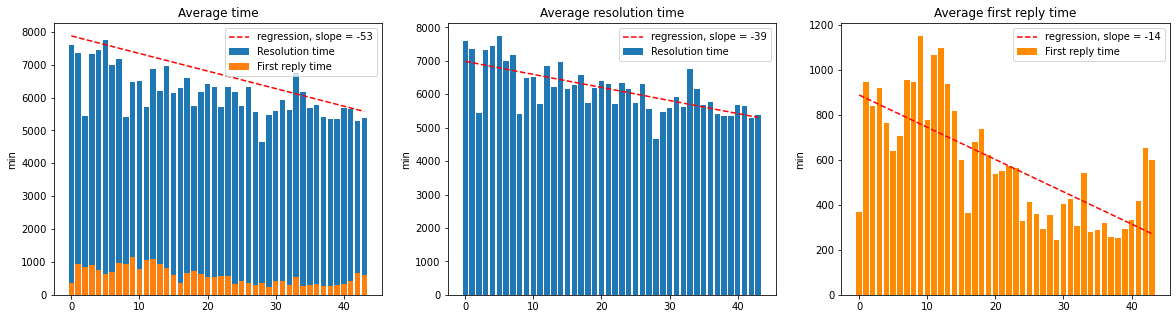

In [32]:
# average resolution time

time_period = cs_weeks

avg_time = []

for i in range(len(time_period)):
    temp_avg_time = (time_period[i]["FullResolutionTime"].sum())/(len(time_period[i]["FullResolutionTime"]))
    avg_time.append(temp_avg_time)

avg_first_time = []
    
for i in range(len(time_period)):
    temp_avg_first_time = (time_period[i]["FirstReplyTime"].sum())/(len(time_period[i]["FirstReplyTime"]))
    avg_first_time.append(temp_avg_first_time)
    
    
x = list(range(len(time_period)))  

#y2 = avg_time - avg_first_time 

avg_resolution_time = [a - b for a, b in zip(avg_time, avg_first_time)]

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_time)
mymodel = list(map(ReturnRegression, x))
    
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(20, 5))
ax0.bar(x, avg_resolution_time, label='Resolution time')
ax0.bar(x, avg_first_time, label='First reply time')
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.0f" % slope))
ax0.set_ylabel('min')
ax0.set_title('Average time')
ax0.legend()

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_resolution_time)
mymodel = list(map(ReturnRegression, x))

ax1.bar(x, avg_resolution_time, label='Resolution time')
ax1.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.0f" % slope))
ax1.set_ylabel('min')
ax1.set_title('Average resolution time')
ax1.legend()

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_first_time)
mymodel = list(map(ReturnRegression, x))

ax2.bar(x, avg_first_time, label='First reply time', color='darkorange')
ax2.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.0f" % slope))
ax2.set_ylabel('min')
ax2.set_title('Average first reply time')
ax2.legend()

plt.show()

38.54958252181155


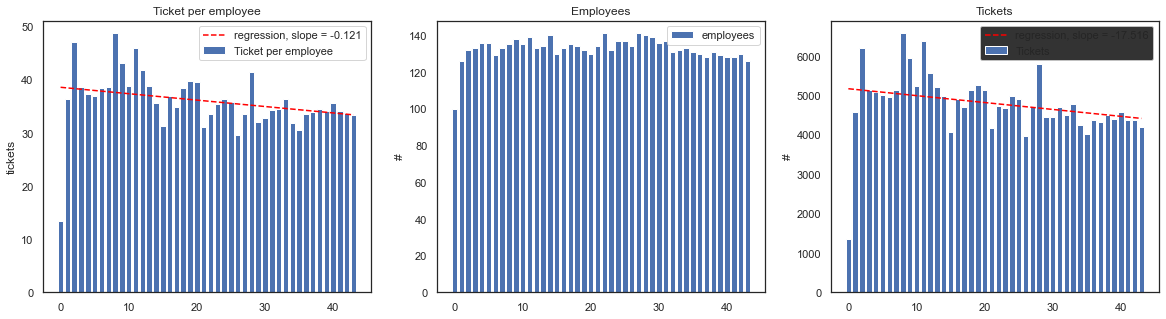

In [97]:
# average workers tickets

time_period = cs_weeks

ticket_per_worker = []

for i in range(len(time_period)):
    temp_tpr = len(time_period[i]) / (time_period[i]["EmployeeID"].nunique())
    ticket_per_worker.append(temp_tpr)

    
x = list(range(len(time_period)))  

workers = []

for i in range(len(time_period)):
    workers_tpr = (time_period[i]["EmployeeID"].nunique())
    workers.append(workers_tpr)
    
tickets = []

for i in range(len(time_period)):
    tickets_tpr = (len(time_period[i]))
    tickets.append(tickets_tpr)

    

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, ticket_per_worker)
mymodel = list(map(ReturnRegression, x))
    
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 5))

ax0.bar(x, ticket_per_worker, label='Ticket per employee')
#ax0.bar(x, avg_first_time, label='First reply time')
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax0.set_ylabel('tickets')
ax0.set_title('Ticket per employee')
ax0.legend(facecolor="white")
print(intercept)

"""
# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_resolution_time)
mymodel = list(map(ReturnRegression, x))
"""
ax1.bar(x, workers, label='employees')
#ax1.plot(x, mymodel, color="red", linestyle='dashed', label = "regression")
ax1.set_ylabel('#')
ax1.set_title('Employees')
ax1.legend(facecolor="white")



# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, tickets)
mymodel = list(map(ReturnRegression, x))

ax2.bar(x, tickets, label='Tickets')
ax2.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax2.set_ylabel('#')
ax2.set_title('Tickets')
ax2.legend()

plt.show()

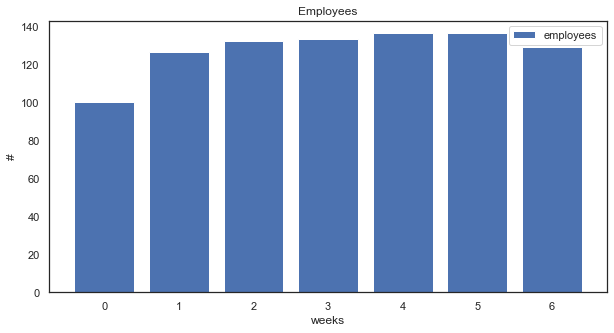

In [108]:
workers = []

for i in range(7):
    workers_tpr = (time_period[i]["EmployeeID"].nunique())
    workers.append(workers_tpr)

    
x = list(range(7))  

fig, ax1 = plt.subplots(figsize = (10,5))

ax1.bar(x, workers, label='employees')
#ax1.plot(x, mymodel, color="red", linestyle='dashed', label = "regression")
ax1.set_ylabel('#')
ax1.set_xlabel("weeks")
ax1.set_title('Employees')
ax1.legend(facecolor="white")

In [103]:
workers

[100, 126, 132, 133, 136, 136, 129]

23167.109090909093


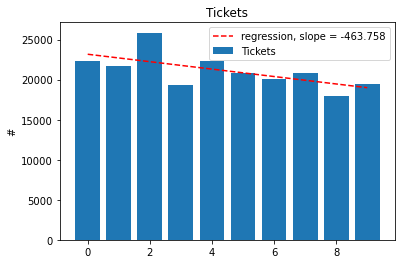

In [34]:
tickets = []

for i in range(len(time_period)):
    tickets_tpr = (len(time_period[i]))
    tickets.append(tickets_tpr)

fig, ax2 = plt.subplots()

slope, intercept, r, p, std_err = stats.linregress(x, tickets)
mymodel = list(map(ReturnRegression, x))

ax2.bar(x, tickets, label='Tickets')
ax2.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax2.set_ylabel('#')
ax2.set_title('Tickets')
ax2.legend(facecolor="white")

print(intercept)

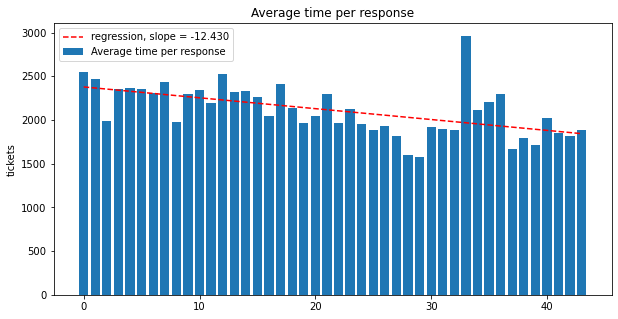

In [35]:
#average time per length of request

time_period = cs_weeks

avg_time = []

for i in range(len(time_period)):
    temp_avg_time = (time_period[i]["FullResolutionTime"]/(time_period[i]["NumPublicComments"]))
    avg_time.append(temp_avg_time.mean())
    
x = list(range(len(time_period)))  
    

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_time)
mymodel = list(map(ReturnRegression, x))
    
fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.bar(x, avg_time, label='Average time per response')
#ax0.bar(x, avg_first_time, label='First reply time')
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax0.set_ylabel('tickets')
ax0.set_title('Average time per response')
ax0.legend()

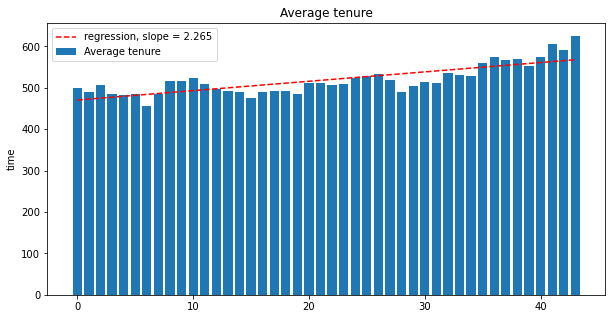

In [36]:
#average employee tenure

time_period = cs_weeks

avg_tenure = []

for i in range(len(time_period)):
    #temp_avg_time = (time_period[i]["WorkerTenure"])
    avg_tenure.append(time_period[i]["WorkerTenure"].mean())
    
x = list(range(len(time_period)))  
    

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_tenure)
mymodel = list(map(ReturnRegression, x))
    
fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.bar(x, avg_tenure, label='Average tenure')
#ax0.bar(x, avg_first_time, label='First reply time')
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax0.set_ylabel('time')
ax0.set_title('Average tenure')
ax0.legend()

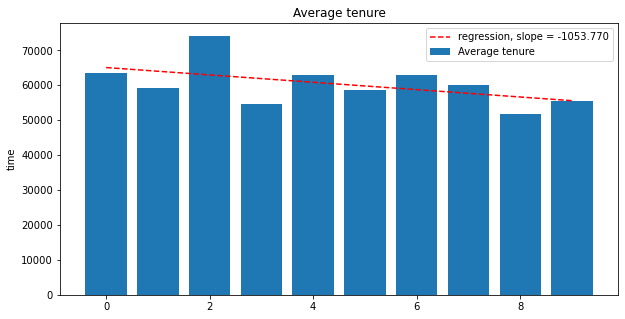

In [37]:
#total number of comments

time_period = cs_months

avg_tenure = []

for i in range(len(time_period)):
    #temp_avg_time = (time_period[i]["WorkerTenure"])
    avg_tenure.append(time_period[i]["NumAgentComments"].sum())
    
x = list(range(len(time_period)))  
    

# return linear regression 
slope, intercept, r, p, std_err = stats.linregress(x, avg_tenure)
mymodel = list(map(ReturnRegression, x))
    
fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.bar(x, avg_tenure, label='Average tenure')
#ax0.bar(x, avg_first_time, label='First reply time')
ax0.plot(x, mymodel, color="red", linestyle='dashed', label = "regression, slope = {}".format("%.3f" % slope))
ax0.set_ylabel('time')
ax0.set_title('Average tenure')
ax0.legend()

In [38]:
cs_data["AssigneeTier"].value_counts()

Tier 1    155525
Tier 2     36493
Triage     12962
Tier 3      2978
Name: AssigneeTier, dtype: int64

In [39]:
# number of tickets per employee (distribution)
# time spent on reply per employee (distribution)

time_period = cs_months

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]

list_ticket_per_employee = []

for i in range(len(time_period)):
    temp_tpe = time_period[i].groupby(["EmployeeID"])["NumPublicComments"].count().tolist()
    list_ticket_per_employee.append(temp_tpe)

df_ticket_per_employee = pd.DataFrame(list_ticket_per_employee).transpose()
df_ticket_per_employee.columns = months

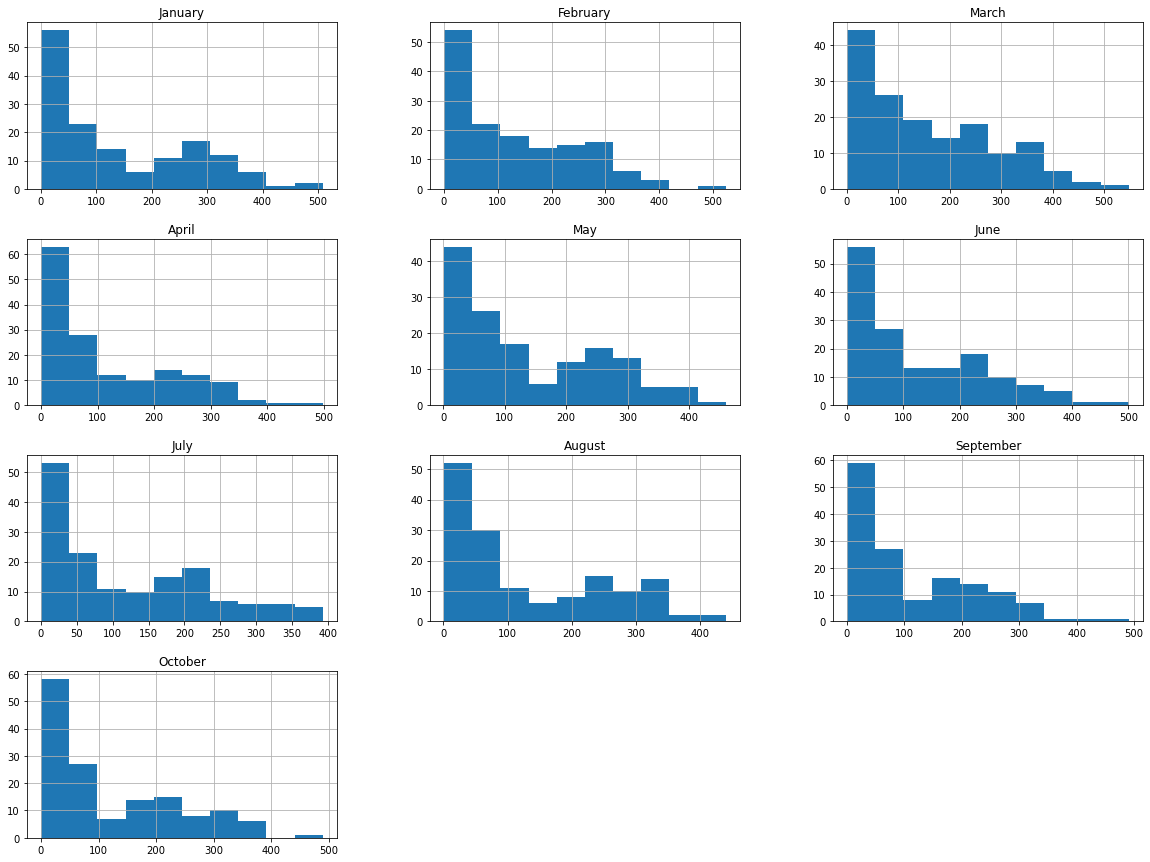

In [40]:
df_ticket_per_employee.hist(figsize=(20,15))
plt.show()

In [41]:
cs_months[3]["EmployeeID"].value_counts().tolist()

[556,
 537,
 465,
 367,
 366,
 364,
 360,
 356,
 353,
 353,
 351,
 348,
 339,
 335,
 324,
 319,
 313,
 309,
 309,
 294,
 288,
 288,
 287,
 281,
 273,
 271,
 270,
 267,
 266,
 264,
 262,
 262,
 258,
 254,
 253,
 250,
 248,
 247,
 245,
 245,
 213,
 209,
 206,
 197,
 196,
 193,
 190,
 188,
 186,
 157,
 152,
 147,
 147,
 140,
 139,
 136,
 135,
 135,
 124,
 118,
 114,
 102,
 99,
 94,
 91,
 91,
 91,
 88,
 83,
 83,
 80,
 78,
 72,
 72,
 67,
 66,
 66,
 64,
 64,
 63,
 63,
 62,
 60,
 59,
 57,
 57,
 55,
 54,
 54,
 53,
 53,
 50,
 48,
 47,
 46,
 45,
 45,
 44,
 44,
 42,
 42,
 41,
 41,
 40,
 38,
 37,
 37,
 37,
 36,
 36,
 34,
 31,
 31,
 30,
 27,
 24,
 24,
 21,
 21,
 21,
 18,
 12,
 11,
 11,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 7,
 7,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [42]:
cs_data["TicketGroup"].value_counts()

Support (T1)                   112207
Support (T2)                    34780
Support (T1 English Phones)     24721
Support (Triage)                12913
Support (T1 - French)            5163
Support (T1 - Portuguese)        3661
Support (T1 - German)            3544
Support (T3)                     2962
Support (Analytics)              2325
Support (T1 - Japanese)          1693
Support (T1 - Spanish)           1535
Support (T1 - Italian)           1071
Support (T1 - Russian)            908
Support (T1 - Dutch)              878
Support (T2 - French)             700
Support (ARM)                     358
Support (Outbound)                357
Support (T2 - German)             339
Support (T2 - Spanish)            225
Support (T2 - Russian)            132
Support (T2 - Japanese)           125
Support (T2 - Italian)             93
Support (Managers)                 55
Support (T1 - Chinese)             55
Security (Projects)                 1
Support (T2 - Portuguese)           1
Name: Ticket

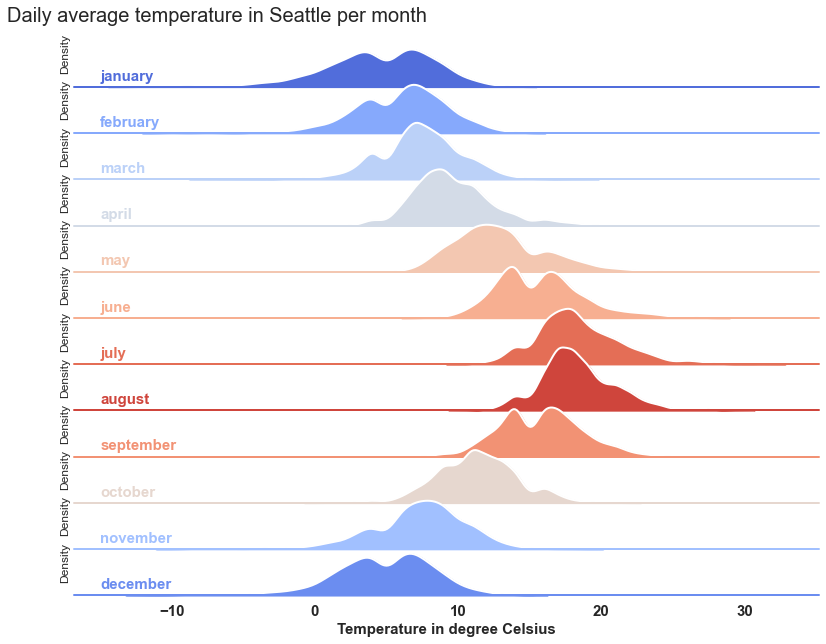

In [43]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

C:\Users\jgrus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jgrus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jgrus\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

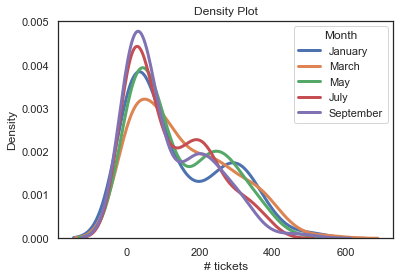

In [63]:
for i in [0, 2, 4, 6, 8]:
    # Draw the density plot
    sns.distplot(df_ticket_per_employee.iloc[:,i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = months[i])
    
# Plot formatting
plt.legend(title = 'Month', facecolor="white")
plt.title('Density Plot')
plt.xlabel('# tickets')
plt.ylabel('Density')
plt.rcParams["figure.figsize"] = (10,10)

In [45]:
df_ticket_per_employee.shape

(154, 10)